# Introduction

The dataset is about sales information of a supermarket. It has the following variables:

**Eight continuous variables:**

- Unit price: The cost of every item in dollars

- Quantity: The total number of goods the buyer has bought

- Tax 5 percent tax fee for customer buying

- Total: The entire cost, including taxes

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage

- Gross income: Gross revenue

- Rating: A customer's entire buying experience on a scale of 1 to 10 based on classification

**Nine categorical variables:**

- Invoice id: An identification number created by a computer from a sales slip

- Branch: A branch of the supercenter

- City: Supercenter locations

- Customer type: Members (customers using member card), Normal (without member card).

- Gender: Customer's gender

- Product line: Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Date: Purchase date (January 2019–March 2019)

- Time: 10 a.m. to 9 p.m. purchase time

- Payment: cash, a credit card, or an eWallet to pay for the purchase



# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

# Data Import

In [ ]:
data = pd.read_csv("/content/supermarket_sales.csv")

# Data Exploration

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.shape

(1000, 17)

In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


Text(0, 0.5, 'Data type')

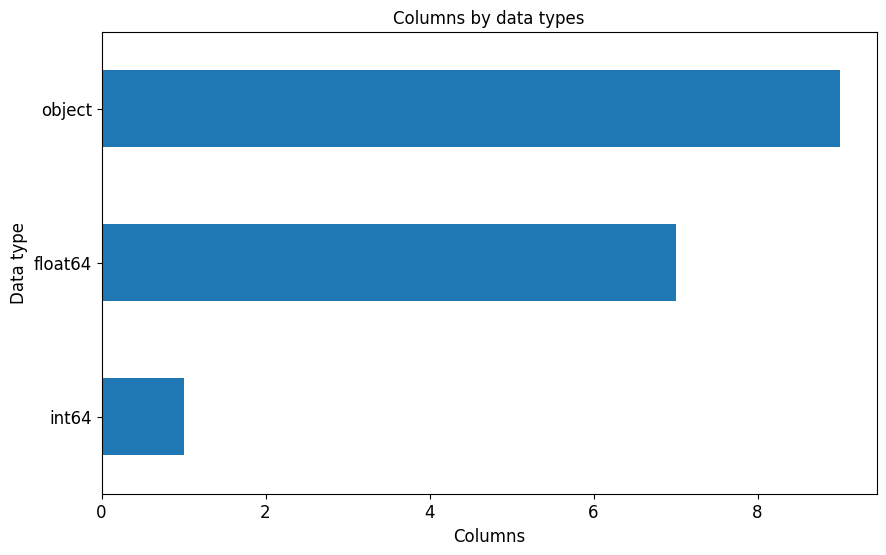

In [ ]:
# Count number of columns for each data type
data.dtypes.value_counts().sort_values().plot(kind='barh',figsize=(10, 6),fontsize=12)
plt.title('Columns by data types', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Data type', fontsize=12)

In [ ]:
# Number of unique categorical values for each feature
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

,0
Invoice ID,1000
Branch,3
City,3
Customer type,2
Gender,2
Product line,6
Date,89
Time,506
Payment,3


In [ ]:
# Check the distribution of categorical data

def cat_distribution(sales,colname):
    a = sales[colname].value_counts()
    return a

In [ ]:
cat_distribution(data,"Branch")

,count
Branch,
A,340
B,332
C,328


In [ ]:
cat_distribution(data,"City")

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [ ]:
cat_distribution(data,"Customer type")

,count
Customer type,
Member,501
Normal,499


In [ ]:
cat_distribution(data,"Gender")

,count
Gender,
Female,501
Male,499


In [ ]:
cat_distribution(data,"Product line")

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [ ]:
cat_distribution(data,"Payment")

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


# Data Preprocessing

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['Day'] = (data['Date']).dt.day
data['Month'] = (data['Date']).dt.month

data['Month'] = data['Month'].apply(lambda x: calendar.month_name[x])

data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = (data['Time']).dt.hour

<ipython-input-145-75ff4b7e4a12>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-12-03 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,January,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-12-03 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,March,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-12-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,March,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-12-03 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,January,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-12-03 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,February,10


In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Day,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2024-12-03 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,15.256000,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2024-12-03 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2024-12-03 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,8.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2024-12-03 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2024-12-03 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,23.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2024-12-03 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,31.000000,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858,8.693563,3.186857


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [ ]:
numeric_cols = [x for x in data.columns if data[x].dtypes == "int64" or data[x].dtypes == "float64" or data[x].dtypes == "int32"]
numeric_cols

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating',
 'Day',
 'Hour']

In [ ]:
numeric_data = data[numeric_cols]

In [ ]:
numeric_data

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Hour
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,5,13
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,8,10
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,3,13
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,27,20
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,8,10
...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,29,13
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,2,17
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,9,13
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,22,15


<Axes: >

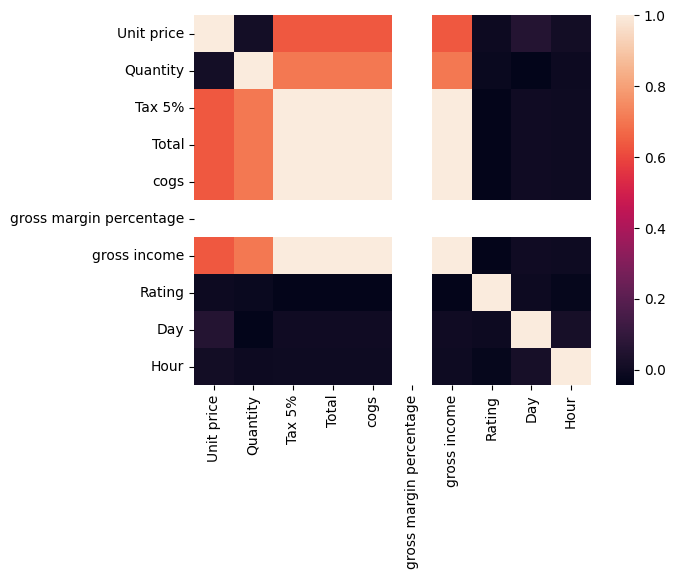

In [ ]:
data_corr = numeric_data.corr()
sns.heatmap(data_corr)

In [ ]:
data_corr["Total"].sort_values(ascending=False)

,Total
Total,1.000000
Tax 5%,1.000000
gross income,1.000000
cogs,1.000000
Quantity,0.705510
Unit price,0.633962
Day,-0.002515
Hour,-0.002770
Rating,-0.036442
gross margin percentage,NaN


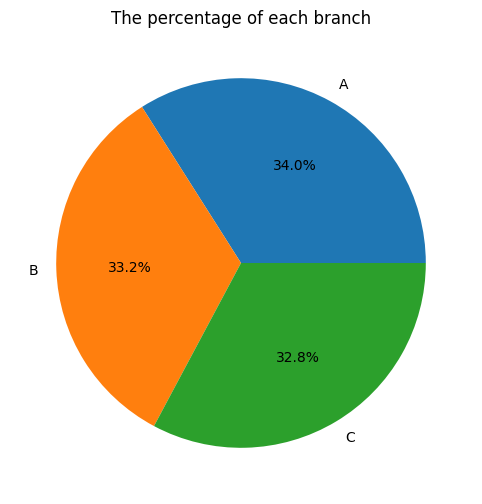

In [ ]:
# The percentage of each branch
plt.figure(figsize = (12,6))
branch = data.Branch.value_counts().reset_index()
plt.pie(branch['count'], labels = branch.Branch,autopct='%1.1f%%')
plt.title("The percentage of each branch")
plt.show()

In [ ]:
branch

,Branch,count
0,A,340
1,B,332
2,C,328


The supermarket has more branches in A than in B and C.

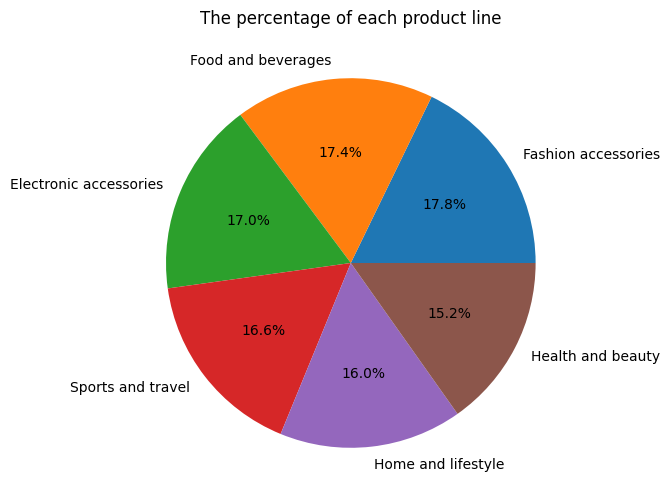

In [ ]:
# The percentage of Product line
plt.figure(figsize = (12,6))
productline = data["Product line"].value_counts().reset_index()
plt.pie(productline["count"], labels = productline["Product line"],autopct='%1.1f%%')
plt.title("The percentage of each product line")
plt.show()

The most popular product across all branches was fashion accessories, followed by food and drink in second place and electronic accessories in third.

<Axes: xlabel='Gender'>

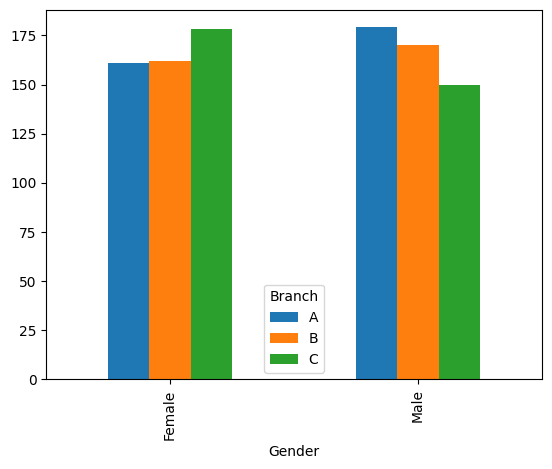

In [ ]:
# The number of gender in each branch
data.groupby(['Branch','Gender']).size().unstack(0).plot.bar()

While Branch A and B are more popular with men, Branch C is more popular with women.

Text(0.5, 1.0, 'Ratings by Branch')

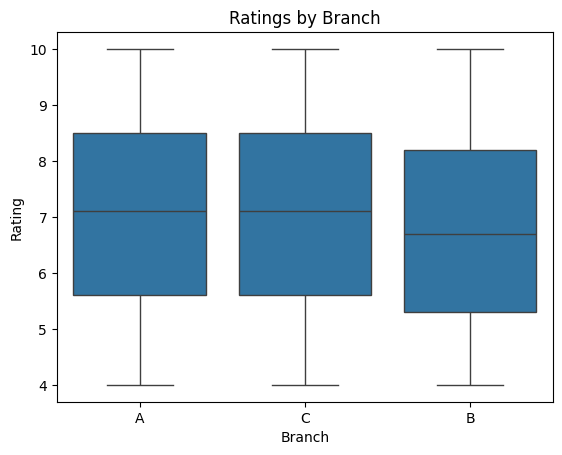

In [ ]:
# Ratings by branches
sns.boxplot(x="Branch", y ="Rating" ,data =data).set_title("Ratings by Branch")

Branch B has the lowest rating while Branch A and C have equal rating.

<Axes: xlabel='Customer type'>

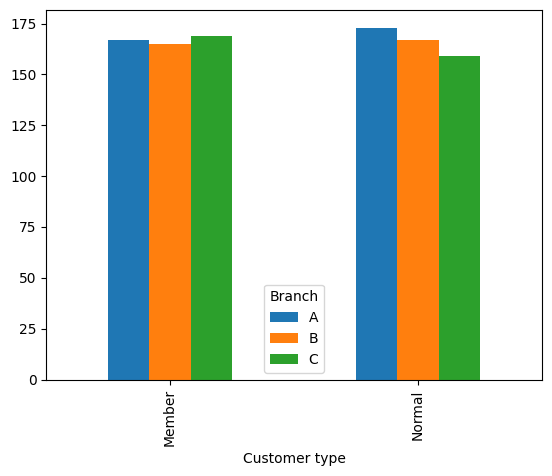

In [ ]:
# Customer type by branches
data.groupby(['Branch','Customer type']).size().unstack(0).plot.bar()

Member customers buy most products from Branch C, while normal members purchase the most products from Branch A.

<Axes: xlabel='count', ylabel='Product line'>

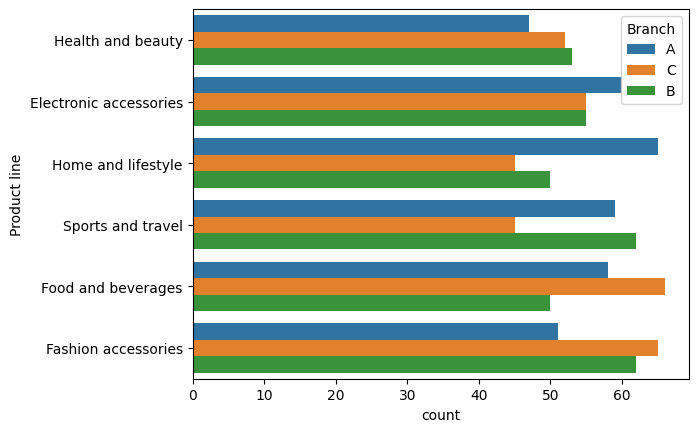

In [ ]:
# Sales of various product categories in various divisions
sns.countplot(y='Product line',hue='Branch',data=data)

The barplot shows that the most popular items in Branch A are home and lifestyle items. Sports, travel, and fashion accessories are the most popular items in Branch B, while food, beverages, and fashion accessories are the most popular in Branch C.

<Axes: xlabel='Total', ylabel='Product line'>

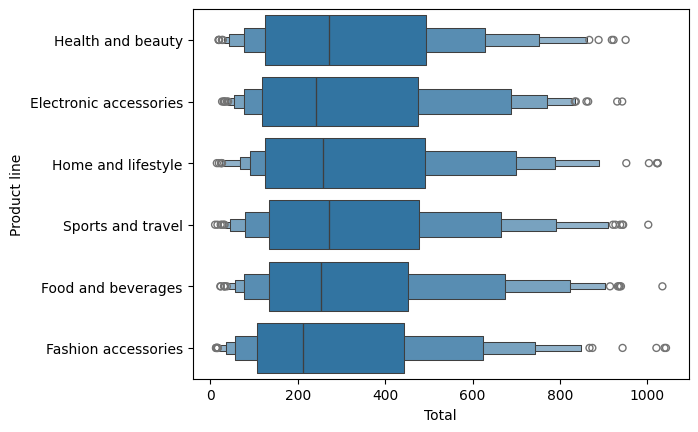

In [ ]:
# Sales of products
sns.boxenplot(y = 'Product line', x = 'Total', data=data )

From the graph, Health and Beauty, Sports and travel generate more total sales than the others.

<Axes: xlabel='Rating', ylabel='Product line'>

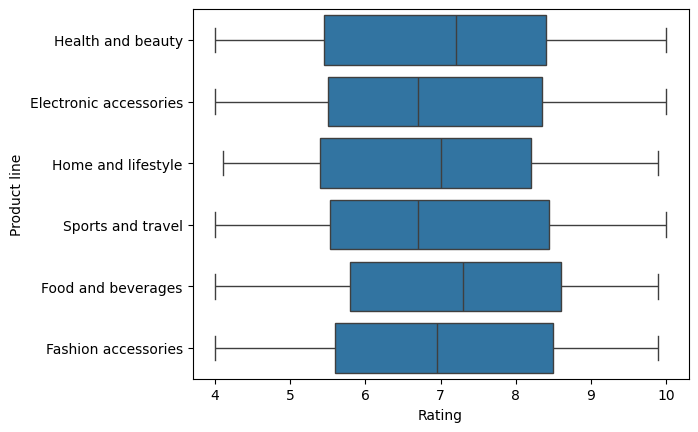

In [ ]:
# Ratings of products
sns.boxplot(y = 'Product line', x = 'Rating', data=data )

Food and beverages, as well as health and beauty products, get higher ratings than other products. Sport and travel items and electronic accessories received the lowest ratings.

<Axes: xlabel='Total', ylabel='Product line'>

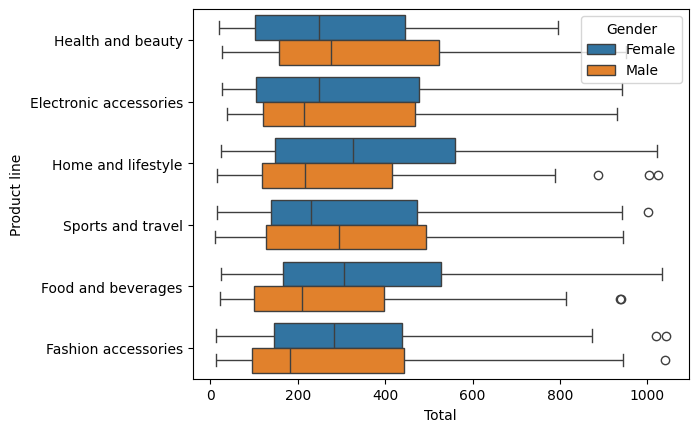

In [ ]:
# Sales of products by Gender
sns.boxplot(y = 'Product line', x='Total', hue='Gender',data=data)

In contrast to men, who are more likely to purchase health and beauty products, women prefer to buy for home goods, food, and beverages, and they make up roughly 380 dollars in sales on average.

<Axes: xlabel='Quantity', ylabel='Product line'>

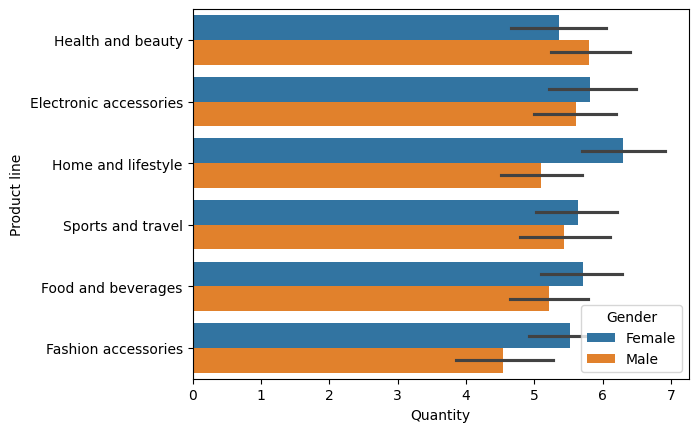

In [ ]:
# Number of products by Gender
sns.barplot(x='Quantity',hue='Gender',y = 'Product line',data=data)

The error bars are long, indicating uncertainty in the mean value. The error bars of the two groups in the home and lifestyle category do not overlap, suggesting statistical significance.

<Axes: xlabel='Unit price', ylabel='Product line'>

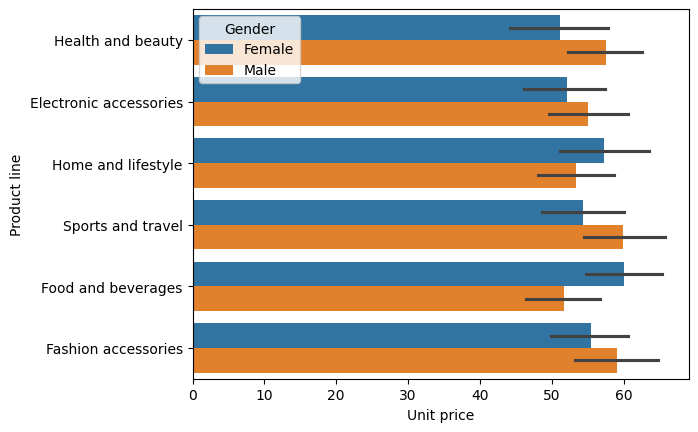

In [ ]:
# Product price by Gender
sns.barplot(x='Unit price',hue='Gender',y = 'Product line',data=data)

The sports and travel category and the food and beverages category have the highest prices. However, both males and females still buy these two categories the most, respectively.

<Axes: xlabel='Total', ylabel='Product line'>

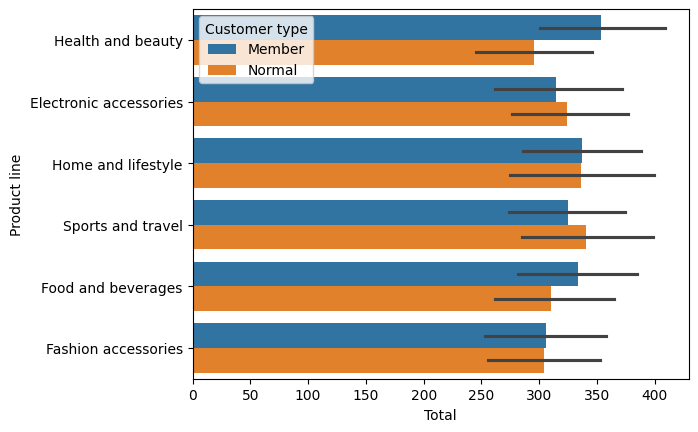

In [ ]:
# Sales of products by Customer Type
sns.barplot(x='Total',hue='Customer type',y = 'Product line',data=data)

While regular consumers choose sports and travel products, which create maximum sales of approximately 340 dollars, members like to purchase more health and beauty products, which generate maximum sales of approximately 350 dollars.

<Axes: xlabel='Quantity', ylabel='Product line'>

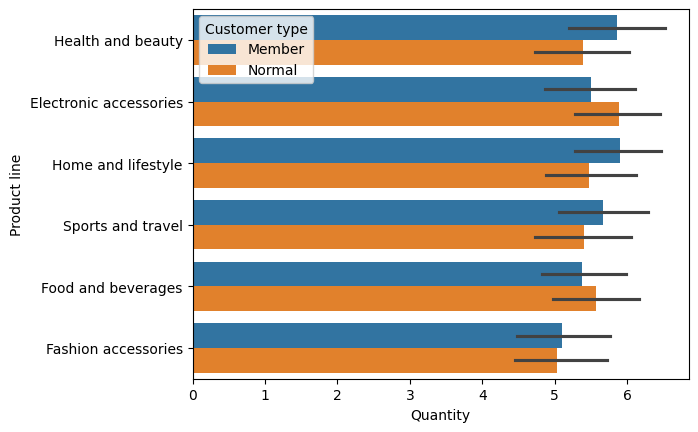

In [ ]:
# Quantity of product by Customer Type

sns.barplot(x='Quantity',hue='Customer type',y = 'Product line',data=data)

Members like to purchase larger quantities of home and lifestyle and health and beauty products, whereas regular customers favor technology accessories.

<Axes: xlabel='Unit price', ylabel='Product line'>

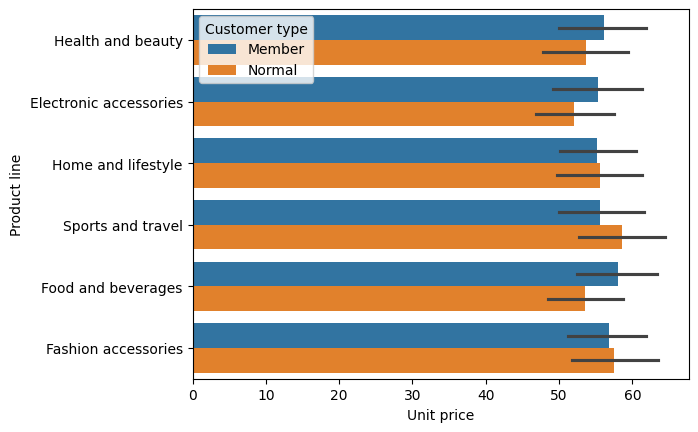

In [ ]:
# Price of products by Customer type
sns.barplot(x='Unit price',hue='Customer type',y = 'Product line',data=data)

This illustrates that members and regular consumers are purchasing as many sports, travel, and food and beverage items as possible despite their increased unit costs since they don't want to sacrifice quality.

<Axes: xlabel='Total', ylabel='Product line'>

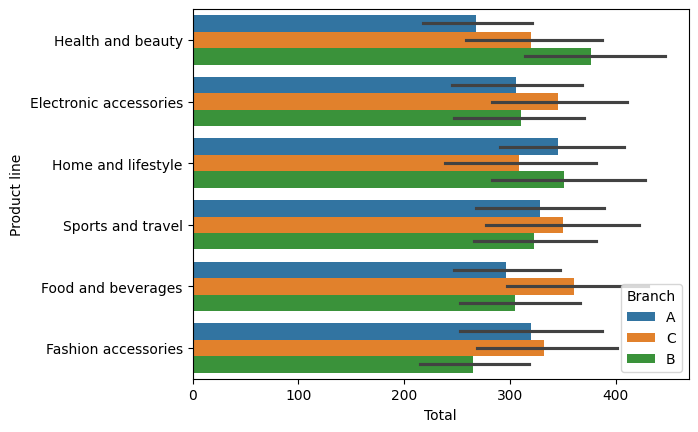

In [ ]:
# Total sales per branch
sns.barplot(x='Total',hue='Branch',y = 'Product line',data=data)

The products that create the highest sales in Branch A are home and lifestyle items, followed by health and beauty items in Branch B and food and beverages in Branch C.

<Axes: xlabel='Total', ylabel='Product line'>

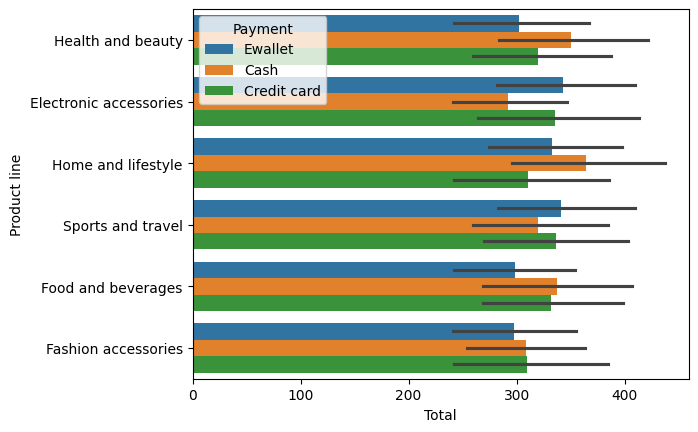

In [ ]:
# Total sales by payment type
sns.barplot(x='Total',hue='Payment',y = 'Product line',data=data)

Cash and e-wallet are the two most common ways to purchase. Either of them ranks first in all categories.

<Axes: xlabel='Total', ylabel='Branch'>

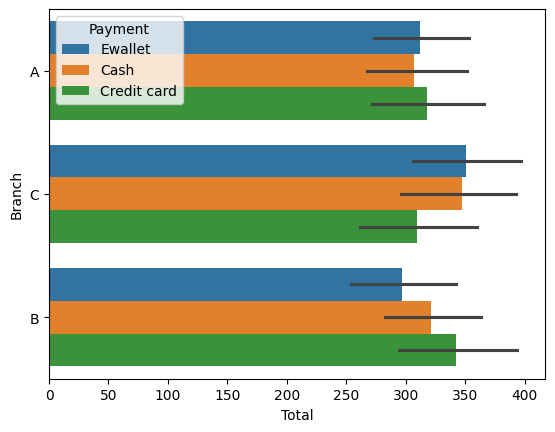

In [ ]:
# Sales by Payment type
sns.barplot(x='Total',hue='Payment',y = 'Branch',data=data)

Credit card payments account for the majority of sales in Branch A, E-wallet payments in Branch B, and credit card payments in Branch C.

<Axes: xlabel='Gender', ylabel='Total'>

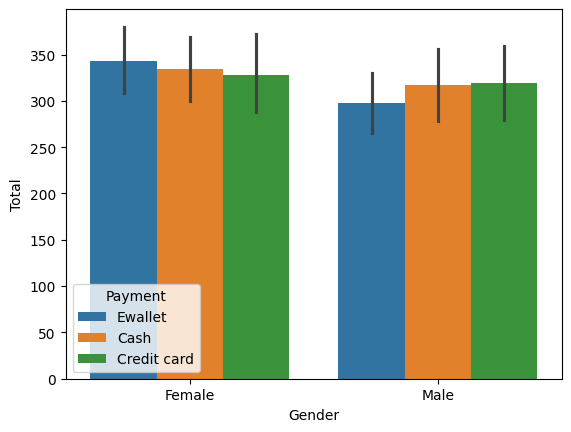

In [ ]:
# Sales by Gender through payment types
sns.barplot(y='Total',hue='Payment',x = 'Gender',data=data)

Men prefer to shop using credit cards, generating maximum sales of approximately $330 while women prefer to purchase items using e-wallets, generating maximum sales of approximately of 348.

<Axes: xlabel='Customer type', ylabel='Total'>

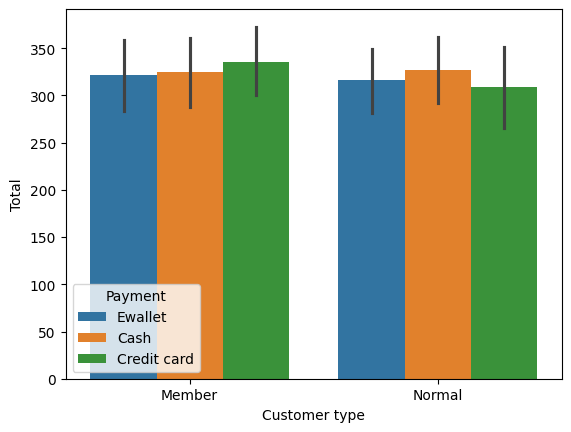

In [ ]:
# Sales by Customer Type through payment types
sns.barplot(y='Total',hue='Payment',x = 'Customer type',data=data)

While regular customers prefer to spend with cash and create maximum sales of approximately $330, members prefer to purchase items using credit cards, generating a maximum sales of approximately 345 dollars.

Text(0.5, 1.0, 'Hourly sales')

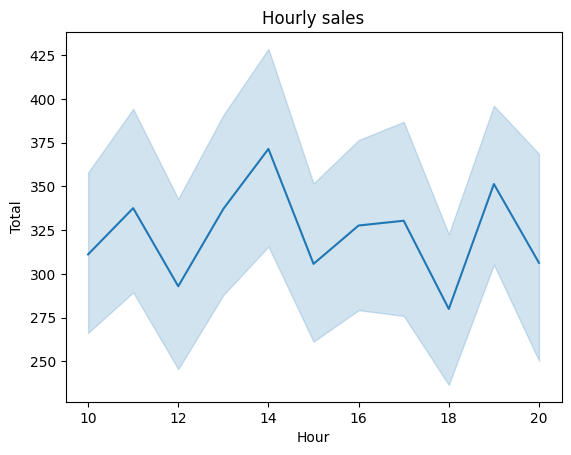

In [ ]:
# Hourly Sales
sns.lineplot(x="Hour",  y = 'Total',data =data).set_title("Hourly sales")

Text(0.5, 1.0, 'Hourly Quantity')

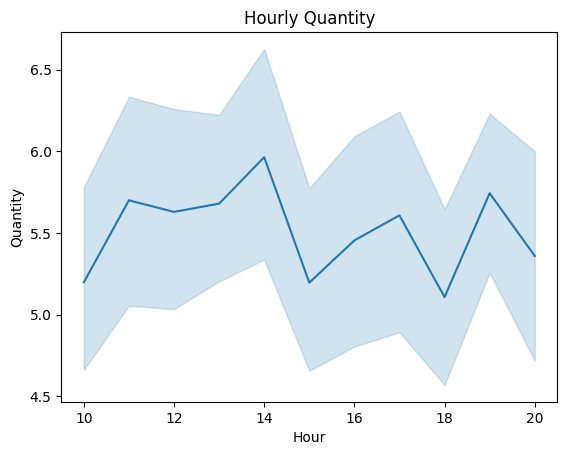

In [ ]:
# Hourly Quantity
sns.lineplot(x="Hour",  y = 'Quantity',data =data).set_title("Hourly Quantity")

The majority of the merchandise was sold at approximately 14:00 local time.

Text(0.5, 1.0, 'Daily sales')

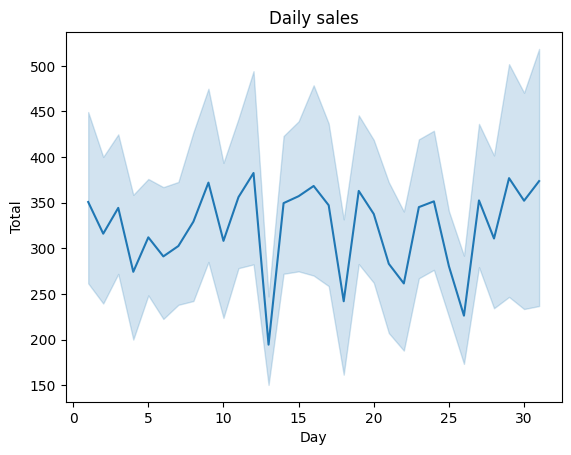

In [ ]:
# Daily Sales
sns.lineplot(x="Day",  y = 'Total',data =data).set_title("Daily sales")

Text(0.5, 1.0, 'Daily Quantity')

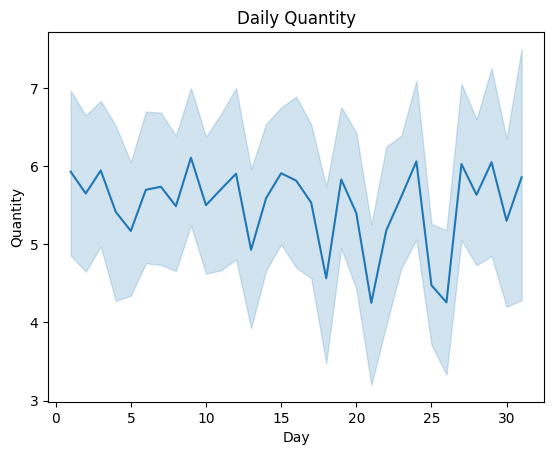

In [ ]:
# Daily Quantity

sns.lineplot(x="Day",  y = 'Quantity',data =data).set_title("Daily Quantity")

The majority of sales are generated in about 28 days.

Text(0.5, 1.0, 'Monthly sales')

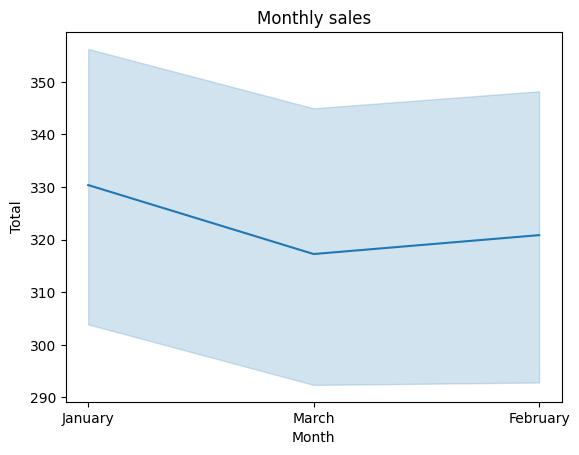

In [ ]:
# Monthly Sales
sns.lineplot(x="Month",  y = 'Total',data = data).set_title("Monthly sales")

Text(0.5, 1.0, 'Monthly Quantity')

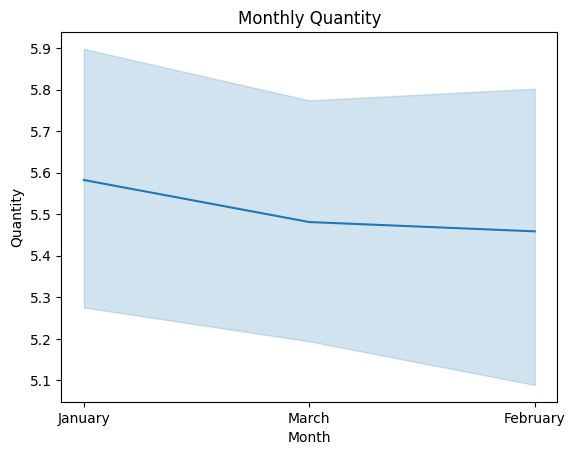

In [ ]:
# Monthly Quantity
sns.lineplot(x="Month",  y = 'Quantity',data = data).set_title("Monthly Quantity")

January sees the highest sales, followed by a sharp decline in March and a modest uptick in February.

# Data Preparation

In [ ]:
# Remove variables not useful for prediction
final_data = data.drop(columns=["Invoice ID","Date","Time","gross margin percentage"])

In [ ]:
final_data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Day,Month,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,5,January,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,8,March,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,March,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,27,January,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,8,February,10


In [ ]:
bi_var = final_data.nunique()[final_data.nunique() == 2].keys().tolist()

In [ ]:
bi_var

['Customer type', 'Gender']

In [ ]:
num_var = final_data.drop(columns = ["Branch","City","Customer type","Gender","Product line","Payment","Month"])

In [ ]:
num_var.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income',
       'Rating', 'Day', 'Hour'],
      dtype='object')

In [ ]:
cat_var = final_data[["Branch","City","Customer type","Gender","Product line","Payment","Month"]]

In [ ]:
cat_var.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'Month'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in bi_var:
    final_data[i] = le.fit_transform(final_data[i])

In [ ]:
final_data = pd.get_dummies(final_data)

,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Day,...,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Month_February,Month_January,Month_March
Customer type,1.000000,0.039996,-0.020238,-0.016763,-0.019670,-0.019670,-0.019670,-0.019670,0.018889,0.034124,...,-0.036011,0.017559,-0.015494,-0.020608,0.018289,-0.069946,0.049835,-0.048730,0.018225,0.028799
Gender,0.039996,1.000000,0.015445,-0.074258,-0.049451,-0.049451,-0.049451,-0.049451,0.004800,0.051157,...,-0.014909,0.067695,0.006328,-0.025984,-0.023813,-0.031061,0.054042,-0.053082,0.001474,0.049835
Unit price,-0.020238,0.015445,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778,0.057021,...,0.005836,-0.013072,-0.005854,0.022257,0.029721,-0.032415,0.001865,0.023901,0.012437,-0.035601
Quantity,-0.016763,-0.074258,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815,-0.043347,...,-0.006084,0.015709,0.027446,0.004912,0.000403,0.006203,-0.006443,-0.011565,0.018258,-0.007163
Tax 5%,-0.019670,-0.049451,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002515,...,-0.000551,0.001165,0.024276,0.016517,0.009474,0.002852,-0.012244,-0.005663,0.022216,-0.016846
Total,-0.019670,-0.049451,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002515,...,-0.000551,0.001165,0.024276,0.016517,0.009474,0.002852,-0.012244,-0.005663,0.022216,-0.016846
cogs,-0.019670,-0.049451,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002515,...,-0.000551,0.001165,0.024276,0.016517,0.009474,0.002852,-0.012244,-0.005663,0.022216,-0.016846
gross income,-0.019670,-0.049451,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002515,...,-0.000551,0.001165,0.024276,0.016517,0.009474,0.002852,-0.012244,-0.005663,0.022216,-0.016846
Rating,0.018889,0.004800,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000,-0.007076,...,0.037546,0.007540,-0.034351,-0.014658,-0.001114,0.011935,-0.010509,0.037842,0.019271,-0.055945
Day,0.034124,0.051157,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,-0.002515,-0.007076,1.000000,...,-0.002897,0.017338,-0.048331,-0.017784,0.021304,-0.035954,0.013722,-0.105823,0.154916,-0.053339


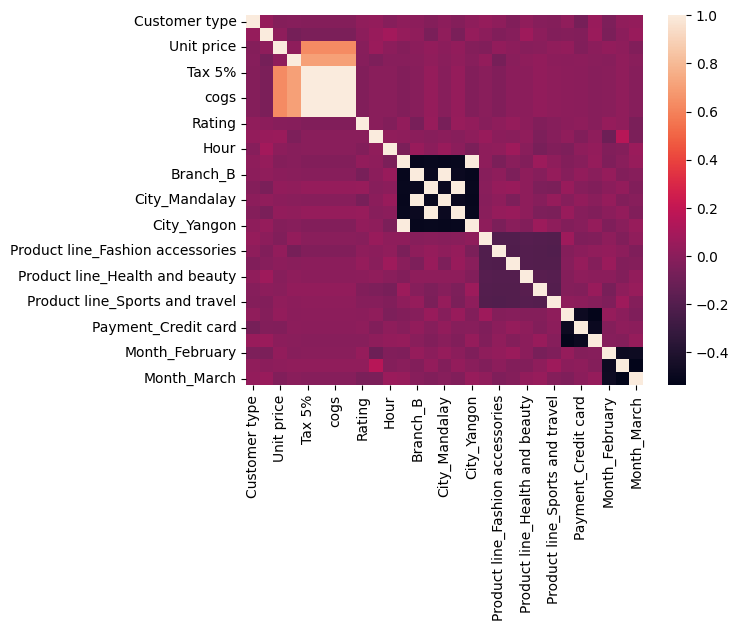

In [ ]:
data_corr["Total"].sort_values(ascending=False)
data_corr2 = final_data.corr()

ax = sns.heatmap(
   data_corr2
)
data_corr2

In [ ]:
data_corr2["Total"].sort_values(ascending=False)

,Total
Total,1.000000
Tax 5%,1.000000
gross income,1.000000
cogs,1.000000
Quantity,0.705510
Unit price,0.633962
Branch_C,0.040176
City_Naypyitaw,0.040176
Product line_Home and lifestyle,0.024276
Month_January,0.022216


In [ ]:
cleaned_data = final_data.drop(columns = ["Tax 5%","cogs","gross income","City_Mandalay","City_Naypyitaw","City_Yangon"])

In [ ]:
cleaned_data.columns

Index(['Customer type', 'Gender', 'Unit price', 'Quantity', 'Total', 'Rating',
       'Day', 'Hour', 'Branch_A', 'Branch_B', 'Branch_C',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'],
      dtype='object')

# Model Building

In [ ]:
# Creating input and output variables
X = cleaned_data.drop(columns=["Total"])
y = cleaned_data["Total"]

In [ ]:
# Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
# Standardising training and testing dataset
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = X.columns)
X_test = standardizer.transform(X_test)
X_test = pd.DataFrame(X_test,columns = X.columns)

# Feature Selection

**Lasso Feature Selection Method**

In [ ]:
# Lasso Feature Selection Method

from sklearn.linear_model import Lasso
model = Lasso(alpha=0.04,random_state=0)
model.fit(X_train,y_train)
model_ldf= pd.DataFrame(list(zip(X_train.columns,model.coef_)),columns=['predictor','coefficient'])
model_ldf

,predictor,coefficient
0,Customer type,1.370618
1,Gender,-2.178444
2,Unit price,151.990204
3,Quantity,171.665796
4,Rating,-7.249468
5,Day,-3.311047
6,Hour,-2.034736
7,Branch_A,-1.097904
8,Branch_B,-0.000000
9,Branch_C,3.924618


**Recursive Feature Elimination Method**

In [ ]:
#Recursive Feature Elimination Method
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth = 6)
rfe = RFE(rf, n_features_to_select=10)
model_rfe = rfe.fit(X_train, y_train)
model_rfe_df = pd.DataFrame(list(zip(X_train.columns,model_rfe.ranking_)), columns = ['predictor','ranking'])
model_rfe_df

,predictor,ranking
0,Customer type,5
1,Gender,8
2,Unit price,1
3,Quantity,1
4,Rating,1
5,Day,1
6,Hour,1
7,Branch_A,1
8,Branch_B,1
9,Branch_C,1


**Random Forest Feature Elimination**

In [ ]:
# Random Forest Feature Elimination
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth = 6)
model_rf = rf.fit(X_train,y_train)
model_rf.feature_importances_
model_rf_df = pd.DataFrame(list(zip(X.columns,model_rf.feature_importances_)),columns=['predictor','feature importance'])
model_rf_df

,predictor,feature importance
0,Customer type,0.000018
1,Gender,0.000010
2,Unit price,0.481490
3,Quantity,0.517658
4,Rating,0.000282
5,Day,0.000108
6,Hour,0.000129
7,Branch_A,0.000038
8,Branch_B,0.000025
9,Branch_C,0.000036


In [ ]:
# Removing useless predictors from training & testing dataset which were depicted from lasso and RFE feature selection methods
X_train = X_train.drop(columns = ["Payment_Credit card","Product line_Food and beverages","Product line_Electronic accessories","Product line_Health and beauty"])
X_test = X_test.drop(columns = ["Payment_Credit card","Product line_Food and beverages","Product line_Electronic accessories","Product line_Health and beauty"])

# **Applying Models**

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model_lm = lm.fit(X_train,y_train)
y_test_pred = model_lm.predict(X_test)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test,y_test_pred)
print("Linear Regression Model MSE: {}".format(lin_mse))
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression Model RMSE: {}".format(lin_rmse))

from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_test,y_test_pred)
print("Linear Regression Model MAE: {}".format(lin_mae))

Linear Regression Model MSE: 6462.145957356769
Linear Regression Model RMSE: 80.38747388341525
Linear Regression Model MAE: 61.56712643756587


In [ ]:
#Fine tuning the model using cross val score

from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(estimator=model_lm,X=X_train,y=y_train,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [97.83436925 76.83806403 93.77057879 76.78846353 76.92619318 78.28966204
 85.78375553 79.06247118 84.79535786 85.52036053]
Mean: 83.56092759358688
Standard deviation: 7.0808014315931525


**Random Forest Model**

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(random_state=0)
modelRF = rf2.fit(X_train,y_train)
y_test_pred2 = modelRF.predict(X_test)
mse_rf = mean_squared_error(y_test,y_test_pred2)
print("Random Forest MSE:{}".format(mse_rf))
rf_rmse = np.sqrt(mse_rf)
print("Random Forest RSE:{}".format(rf_rmse))
rf_mae = mean_absolute_error(y_test,y_test_pred2)
print("Random Forest Model MAE: {}".format(rf_mae))

Random Forest MSE:142.93076974968747
Random Forest RSE:11.955365730486353
Random Forest Model MAE: 7.869458799999993


In [ ]:
#Fine tuning the model using randomised search cv
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf3=RandomForestRegressor(random_state=0)
param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10,12],
}

CV_rf3 = GridSearchCV(estimator=rf3, param_grid=param_grid, cv= 10)
rf3_result = CV_rf3.fit(X_train, y_train)
CV_rf3.cv_results_
df_rf3 = pd.DataFrame(CV_rf3.cv_results_)
df_rf3

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001300,0.000163,0.000000,0.000000,4,auto,100,"{'max_depth': 4, 'max_features': 'auto', 'n_es...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
1,0.001185,0.000097,0.000000,0.000000,4,auto,200,"{'max_depth': 4, 'max_features': 'auto', 'n_es...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
2,0.228594,0.008939,0.010686,0.001350,4,sqrt,100,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.599516,0.655146,...,0.662702,0.689470,0.699211,0.588191,0.688650,0.651333,0.675631,0.661865,0.038391,19
3,0.316863,0.066988,0.012619,0.004146,4,sqrt,200,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.628942,0.670309,...,0.670363,0.706178,0.701864,0.611198,0.701436,0.660491,0.698394,0.676729,0.033489,17
4,0.143158,0.004024,0.007177,0.000971,4,log2,100,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",0.599516,0.655146,...,0.662702,0.689470,0.699211,0.588191,0.688650,0.651333,0.675631,0.661865,0.038391,19
5,0.283586,0.007980,0.011141,0.000402,4,log2,200,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",0.628942,0.670309,...,0.670363,0.706178,0.701864,0.611198,0.701436,0.660491,0.698394,0.676729,0.033489,17
6,0.000754,0.000098,0.000000,0.000000,6,auto,100,"{'max_depth': 6, 'max_features': 'auto', 'n_es...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
7,0.000723,0.000017,0.000000,0.000000,6,auto,200,"{'max_depth': 6, 'max_features': 'auto', 'n_es...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
8,0.161222,0.006040,0.007094,0.000297,6,sqrt,100,"{'max_depth': 6, 'max_features': 'sqrt', 'n_es...",0.798145,0.803087,...,0.801327,0.797118,0.833593,0.769193,0.841790,0.791218,0.816246,0.806845,0.019999,15
9,0.428476,0.088957,0.015651,0.003586,6,sqrt,200,"{'max_depth': 6, 'max_features': 'sqrt', 'n_es...",0.807154,0.809275,...,0.805231,0.819108,0.814696,0.768920,0.834789,0.790357,0.814889,0.809228,0.017779,13


In [ ]:
rf3_result.best_params_

{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}

In [ ]:
model_rfr = RandomForestRegressor(max_depth=12,max_features='sqrt',n_estimators=200)
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)
mse_rf2 = mean_squared_error(y_test,y_pred_rfr)
print("Random Forest MSE:{}".format(mse_rf2))
rf2_rmse = np.sqrt(mse_rf2)
print("Random Forest RSE:{}".format(rf2_rmse))
rf2_mae = mean_absolute_error(y_test,y_pred_rfr)
print("Random Forest Model MAE: {}".format(rf2_mae))

Random Forest MSE:7211.827141756546
Random Forest RSE:84.92247724693708
Random Forest Model MAE: 63.29780809036614


**Feature Importance**

In [ ]:
# Feature Importance

feature_importances_rfr = rf3_result.best_estimator_.feature_importances_
feature_importances_rfr

array([0.00975187, 0.01125922, 0.35544128, 0.39691587, 0.05325802,
       0.04734938, 0.03743368, 0.0073089 , 0.00717767, 0.00838631,
       0.00769623, 0.00841347, 0.00701774, 0.00905629, 0.00933426,
       0.00734807, 0.00791465, 0.0089371 ])

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

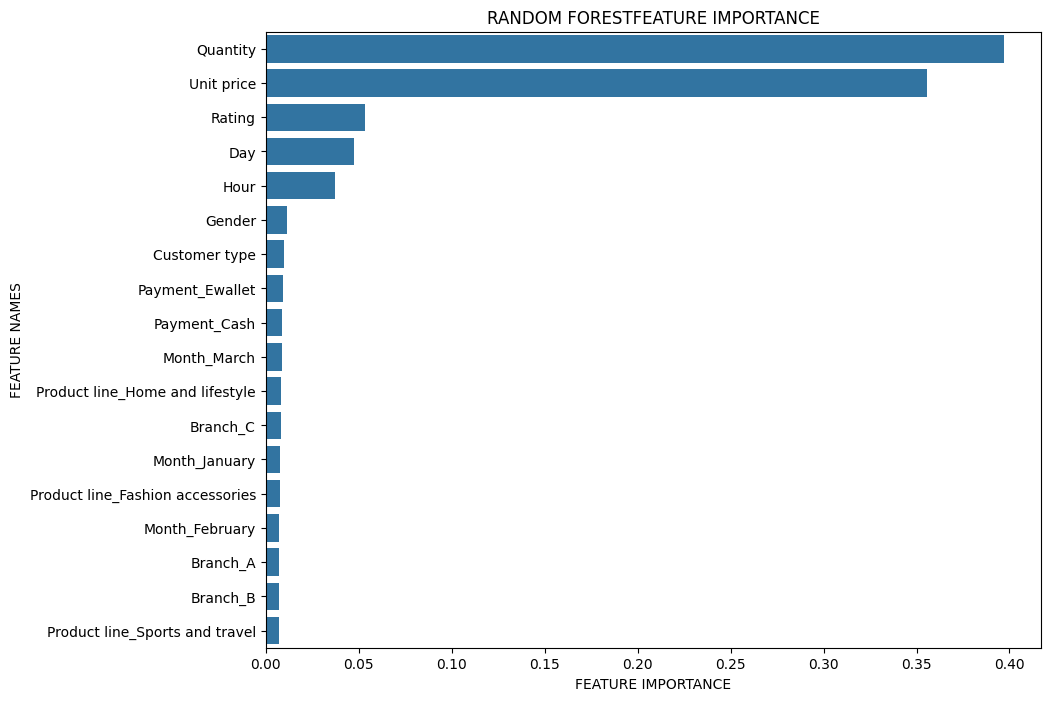

In [ ]:
plot_feature_importance(rf3_result.best_estimator_.feature_importances_,X_train.columns,'RANDOM FOREST')

**Gradient Boosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(random_state=0)
model_gbt = gbt.fit(X_train,y_train)
y_pred_gbt = model_gbt.predict(X_test)
mse_gbt = mean_squared_error(y_test,y_pred_gbt)
print("GBT Model MSE:{}".format(mse_gbt))
gbt_rmse = np.sqrt(mse_gbt)
print("GBT Model RMSE:{}".format(gbt_rmse))
gbt_mae = mean_absolute_error(y_test,y_pred_gbt)
print("GBT Model MAE: {}".format(gbt_mae))

GBT Model MSE:113.29239311636935
GBT Model RMSE:10.643889942890679
GBT Model MAE: 7.501795136962137


In [ ]:
#fine Tuning the model
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(random_state=0)
parameters = {
    "learning_rate": [0.01, 0.025, 0.05,],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[200,500]
    }

clf = GridSearchCV(estimator=gbt, param_grid=parameters, cv=10,verbose = 0)
gbt_result = clf.fit(X_train, y_train)
clf.cv_results_
df_gbt = pd.DataFrame(clf.cv_results_)
df_gbt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.189829,0.007450,0.003185,0.000489,0.010,3,log2,200,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.686939,...,0.720591,0.731142,0.714574,0.649770,0.726150,0.697377,0.713067,0.707705,0.023380,35
1,0.535712,0.064592,0.004702,0.000805,0.010,3,log2,500,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.888492,...,0.918822,0.918320,0.908756,0.882477,0.914381,0.902777,0.907800,0.905384,0.011288,29
2,0.184719,0.002814,0.003142,0.000467,0.010,3,sqrt,200,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.686939,...,0.720591,0.731142,0.714574,0.649770,0.726150,0.697377,0.713067,0.707705,0.023380,35
3,0.635494,0.310279,0.004581,0.001990,0.010,3,sqrt,500,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.888492,...,0.918822,0.918320,0.908756,0.882477,0.914381,0.902777,0.907800,0.905384,0.011288,29
4,0.270761,0.037848,0.004471,0.001200,0.010,5,log2,200,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",0.805277,...,0.833914,0.824849,0.839512,0.801679,0.833181,0.814399,0.838054,0.826193,0.013345,33
5,0.591434,0.074824,0.004822,0.000459,0.010,5,log2,500,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",0.935500,...,0.956608,0.952552,0.952714,0.944115,0.951277,0.943621,0.958079,0.950781,0.007179,13
6,0.225397,0.005686,0.003443,0.000224,0.010,5,sqrt,200,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",0.805277,...,0.833914,0.824849,0.839512,0.801679,0.833181,0.814399,0.838054,0.826193,0.013345,33
7,0.635605,0.086737,0.006042,0.001643,0.010,5,sqrt,500,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",0.935500,...,0.956608,0.952552,0.952714,0.944115,0.951277,0.943621,0.958079,0.950781,0.007179,13
8,0.325828,0.037260,0.005041,0.002158,0.010,8,log2,200,"{'learning_rate': 0.01, 'max_depth': 8, 'max_f...",0.842685,...,0.856438,0.860104,0.864379,0.829229,0.872459,0.851307,0.847701,0.855682,0.012476,31
9,0.796583,0.076014,0.007326,0.000586,0.010,8,log2,500,"{'learning_rate': 0.01, 'max_depth': 8, 'max_f...",0.918039,...,0.929241,0.932027,0.933919,0.910712,0.940036,0.923215,0.925719,0.929003,0.009234,19


In [ ]:
gbt_result.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 500}

In [ ]:
model_gbt2 = GradientBoostingRegressor(learning_rate=0.05,max_depth=3,max_features='log2',n_estimators=500)
model_gbt2.fit(X_train, y_train)
y_pred_gbt2 = model_gbt2.predict(X_test)
mse_gbt2 = mean_squared_error(y_test,y_pred_gbt)
print("GBT Model MSE:{}".format(mse_gbt2))
gbt_rmse2 = np.sqrt(mse_gbt2)
print("GBT Model RMSE:{}".format(gbt_rmse2))
gbt_mae2 = mean_absolute_error(y_test,y_pred_gbt)
print("GBT Model MAE: {}".format(gbt_mae2))

GBT Model MSE:113.29239311636935
GBT Model RMSE:10.643889942890679
GBT Model MAE: 7.501795136962137


**Feature Importance**

In [ ]:
# Feature Importance
feature_importances_gbt = gbt_result.best_estimator_.feature_importances_
feature_importances_gbt

array([8.01305625e-04, 4.32806840e-03, 4.55080778e-01, 4.96354164e-01,
       1.01395548e-02, 1.19309132e-02, 9.30600532e-03, 6.91913769e-04,
       1.07490068e-03, 1.47672955e-03, 8.23251150e-04, 2.62895750e-03,
       3.68451198e-04, 9.36909261e-04, 1.47616365e-03, 8.43684711e-04,
       3.59675816e-04, 1.37857370e-03])

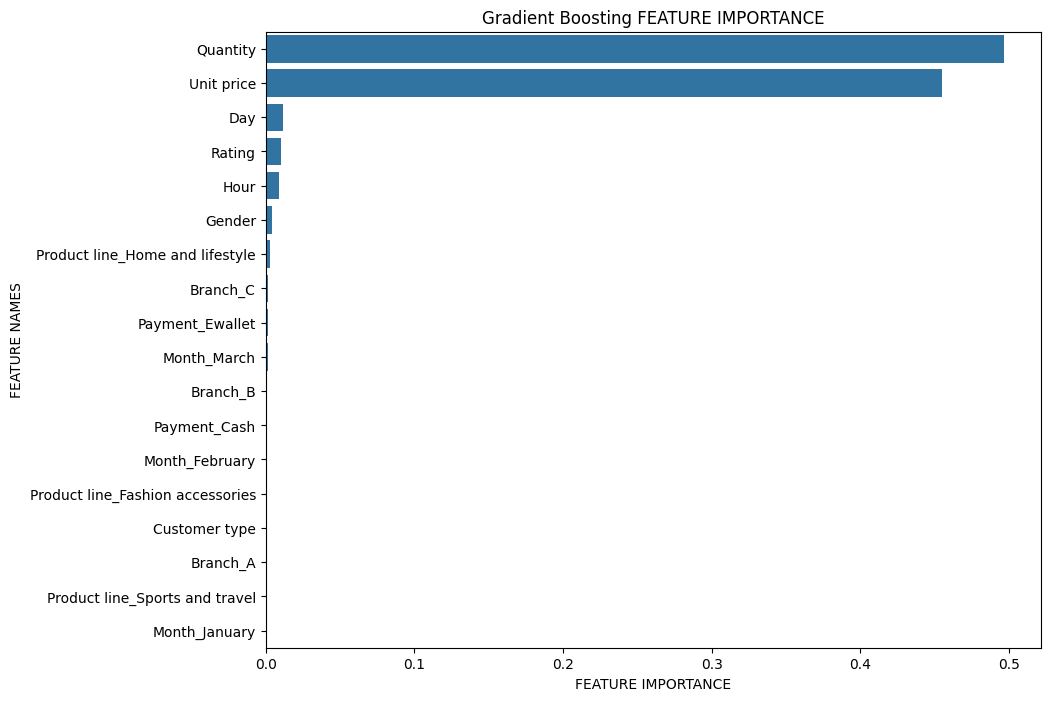

In [ ]:
plot_feature_importance(gbt_result.best_estimator_.feature_importances_,X_train.columns,'Gradient Boosting ')

In [ ]:
#Summary of scores

df = {'Models': ["Linear Regression","Random Forest Classifier","Gradient Boosting Classifier"],
     'MSE': [6474.63,163.21,113.29],
     'RMSE': [80.46,12.77,10.64],
     'MAE': [31.61,8.46,7.50]}
summary = pd.DataFrame(df)

In [ ]:
summary

,Models,MSE,RMSE,MAE
0,Linear Regression,6474.63,80.46,31.61
1,Random Forest Classifier,163.21,12.77,8.46
2,Gradient Boosting Classifier,113.29,10.64,7.50


Text(0, 0.5, 'Models')

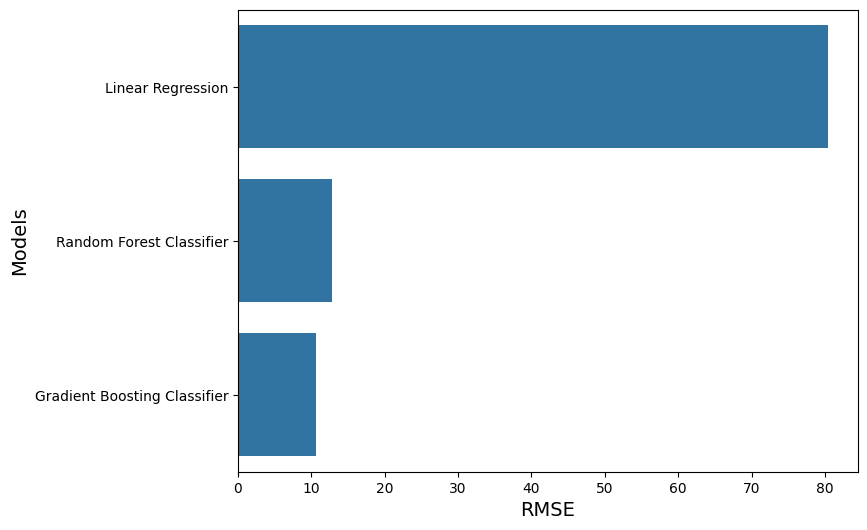

In [ ]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="RMSE",y="Models",data=summary)
plt.xlabel("RMSE", size=14)
plt.ylabel("Models", size=14)

# Causal Inference

In [ ]:
pip install dowhy

In [ ]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter
import dowhy.api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

**Creating Causal Models with Treatment and control features and target variable**

In [ ]:
data = pd.read_csv('/content/supermarket_sales.csv')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['Day'] = (data['Date']).dt.day
data['Month'] = (data['Date']).dt.month

data['Month'] = data['Month'].apply(lambda x: calendar.month_name[x])

data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = (data['Time']).dt.hour


<ipython-input-222-75ff4b7e4a12>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [ ]:
# Removing variables from the data which don't have any predictive power

final_data = data.drop(columns=["Invoice ID","Date","Time","gross margin percentage"])

In [ ]:
bi_var = final_data.nunique()[final_data.nunique() == 2].keys().tolist()
num_var = final_data.drop(columns = ["Branch","City","Customer type","Gender","Product line","Payment","Month"])


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in bi_var:
    final_data[i] = le.fit_transform(final_data[i])

In [ ]:
final_data = pd.get_dummies(final_data)

In [ ]:
final_data.columns

Index(['Customer type', 'Gender', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'cogs', 'gross income', 'Rating', 'Day', 'Hour', 'Branch_A', 'Branch_B',
       'Branch_C', 'City_Mandalay', 'City_Naypyitaw', 'City_Yangon',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'],
      dtype='object')

In [ ]:
corr = final_data.corr()['Total'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))
print('------------------------------')
print(corr)

Top 10 - Positive Correlations:
-----------------------------------
Month_January                      0.022216
Product line_Home and lifestyle    0.024276
Branch_C                           0.040176
City_Naypyitaw                     0.040176
Unit price                         0.633962
Quantity                           0.705510
cogs                               1.000000
Tax 5%                             1.000000
gross income                       1.000000
Total                              1.000000
Name: Total, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Gender                             -0.049451
Rating                             -0.036442
Product line_Fashion accessories   -0.033850
City_Yangon                        -0.030994
Branch_A                           -0.030994
Customer type                      -0.019670
Month_March                        -0.016846
Payment_Ewallet                    -0.012244
City_Mandalay                      -0.00

Assume treatments such as customer type, gender, unit price, quantity, rating and hour, which may have correlations with the sales generation in a company. Therefore, casual models are built based on them.


In [ ]:
model1= CausalModel(
        data=final_data,
        treatment='Customer type',
        outcome="Total",
        common_causes=['Gender','Unit price','Quantity','Rating','Hour','Branch_A', 'Branch_B',
       'Branch_C','Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel','Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'])

In [ ]:
model2= CausalModel(
        data=final_data,
        treatment='Gender',
        outcome="Total",
        common_causes=['Customer type','Unit price','Quantity','Rating','Hour','Branch_A', 'Branch_B',
       'Branch_C','Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel','Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'])

In [ ]:
model3= CausalModel(
        data=final_data,
        treatment='Unit price',
        outcome="Total",
        common_causes=['Customer type','Gender','Quantity','Rating','Hour','Branch_A', 'Branch_B',
       'Branch_C','Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel','Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'],
        )

In [ ]:
model4= CausalModel(
        data=final_data,
        treatment='Quantity',
        outcome="Total",
        common_causes=['Customer type','Gender','Unit price','Rating','Hour','Branch_A', 'Branch_B',
       'Branch_C','Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel','Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'],
        )

In [ ]:
model5= CausalModel(
        data=final_data,
        treatment='Rating',
        outcome="Total",
        common_causes=['Customer type','Gender','Unit price','Quantity','Hour','Branch_A', 'Branch_B',
       'Branch_C','Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel','Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'],
        )

In [ ]:
model6= CausalModel(
        data=final_data,
        treatment='Hour',
        outcome="Total",
        common_causes=['Customer type','Gender','Unit price','Quantity','Rating','Branch_A', 'Branch_B',
       'Branch_C','Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel','Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet', 'Month_February', 'Month_January', 'Month_March'],
        )

**Estimation**

In [ ]:
identify1 = model1.identify_effect(proceed_when_unidentifiable=True)
print(identify1)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                                           ↪
────────────────(E[Total|Month_January,Rating,Month_February,Unit price,Gender,Product line_Sports ↪
d[Customer type]                                                                                   ↪

↪                                                                                                  ↪
↪  and travel,Product line_Fashion accessories,Month_March,Product line_Health and beauty,Product  ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ line_Electronic accessories,Branch_C,Branch_B,Product line_Food and beverages,Payment_Cash,Payme ↪
↪                                                                                

In [ ]:
identify2 = model2.identify_effect(proceed_when_unidentifiable=True)
print(identify2)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                                              ↪
─────────(E[Total|Month_January,Rating,Month_February,Unit price,Product line_Sports and travel,Pr ↪
d[Gender]                                                                                          ↪

↪                                                                                                  ↪
↪ oduct line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_Electroni ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ c accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_Cash,Payme ↪
↪                                                                                

In [ ]:
identify3 = model3.identify_effect(proceed_when_unidentifiable=True)
print(identify3)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                                            ↪
─────────────(E[Total|Month_January,Rating,Month_February,Gender,Product line_Sports and travel,Pr ↪
d[Unit price]                                                                                      ↪

↪                                                                                                  ↪
↪ oduct line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_Electroni ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ c accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_Cash,Payme ↪
↪                                                                                

In [ ]:
identify4 = model4.identify_effect(proceed_when_unidentifiable=True)
print(identify4)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                             ↪
───────────(E[Total|Month_January,Rating,Month_February,Unit price,Gender,Product line_Sports and  ↪
d[Quantity]                                                                                        ↪

↪                                                                                                  ↪
↪ travel,Product line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_ ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ Electronic accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_C ↪
↪                                                                                

In [ ]:
identify5 = model5.identify_effect(proceed_when_unidentifiable=True)
print(identify5)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                                              ↪
─────────(E[Total|Month_January,Month_February,Unit price,Gender,Product line_Sports and travel,Pr ↪
d[Rating]                                                                                          ↪

↪                                                                                                  ↪
↪ oduct line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_Electroni ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ c accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_Cash,Payme ↪
↪                                                                                

In [ ]:
identify6 = model6.identify_effect(proceed_when_unidentifiable=True)
print(identify6)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                                               ↪
───────(E[Total|Month_January,Rating,Month_February,Unit price,Gender,Product line_Sports and trav ↪
d[Hour]                                                                                            ↪

↪                                                                                                  ↪
↪ el,Product line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_Elec ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ tronic accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_Cash, ↪
↪                                                                                

**Causal Effects**

In [ ]:
estimate1 = model1.estimate_effect(identify1,method_name="backdoor.linear_regression",test_significance=True)
print(estimate1)
print("Causal Estimate is " + str(estimate1.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                                           ↪
────────────────(E[Total|Month_January,Rating,Month_February,Unit price,Gender,Product line_Sports ↪
d[Customer type]                                                                                   ↪

↪                                                                                                  ↪
↪  and travel,Product line_Fashion accessories,Month_March,Product line_Health and beauty,Product  ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ line_Electronic accessories,Branch_C,Branch_B,Product line_Food and beverages,Payment_Cash,Payme ↪
↪                                

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
estimate2 = model2.estimate_effect(identify2,method_name="backdoor.linear_regression",test_significance=True)
print(estimate2)
print("Causal Estimate is " + str(estimate2.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                                              ↪
─────────(E[Total|Month_January,Rating,Month_February,Unit price,Product line_Sports and travel,Pr ↪
d[Gender]                                                                                          ↪

↪                                                                                                  ↪
↪ oduct line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_Electroni ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ c accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_Cash,Payme ↪
↪                                

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
estimate3 = model3.estimate_effect(identify3,method_name="backdoor.linear_regression",test_significance=True)
print(estimate3)
print("Causal Estimate is " + str(estimate3.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                                            ↪
─────────────(E[Total|Month_January,Rating,Month_February,Gender,Product line_Sports and travel,Pr ↪
d[Unit price]                                                                                      ↪

↪                                                                                                  ↪
↪ oduct line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_Electroni ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ c accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_Cash,Payme ↪
↪                                

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
estimate4 = model4.estimate_effect(identify4,method_name="backdoor.linear_regression",test_significance=True)
print(estimate4)
print("Causal Estimate is " + str(estimate4.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                             ↪
───────────(E[Total|Month_January,Rating,Month_February,Unit price,Gender,Product line_Sports and  ↪
d[Quantity]                                                                                        ↪

↪                                                                                                  ↪
↪ travel,Product line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_ ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ Electronic accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_C ↪
↪                                

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
estimate5 = model5.estimate_effect(identify5,method_name="backdoor.linear_regression",test_significance=True)
print(estimate5)
print("Causal Estimate is " + str(estimate5.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                                              ↪
─────────(E[Total|Month_January,Month_February,Unit price,Gender,Product line_Sports and travel,Pr ↪
d[Rating]                                                                                          ↪

↪                                                                                                  ↪
↪ oduct line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_Electroni ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ c accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_Cash,Payme ↪
↪                                

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
estimate6 = model6.estimate_effect(identify6,method_name="backdoor.linear_regression",test_significance=True)
print(estimate6)
print("Causal Estimate is " + str(estimate6.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                                               ↪
───────(E[Total|Month_January,Rating,Month_February,Unit price,Gender,Product line_Sports and trav ↪
d[Hour]                                                                                            ↪

↪                                                                                                  ↪
↪ el,Product line_Fashion accessories,Month_March,Product line_Health and beauty,Product line_Elec ↪
↪                                                                                                  ↪

↪                                                                                                  ↪
↪ tronic accessories,Customer type,Branch_B,Product line_Food and beverages,Branch_C,Payment_Cash, ↪
↪                                

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
df = {'Treatments': ["Customer type","Gender","Unit Price","Quantity","Rating","Hour"],
     'Causal Effects': [3.27,-3.19,5.81,58.66,-2.85,-0.25],
     'p-value': [0.52,0.54,0.00,0.00,0.05,0.75]}

result = pd.DataFrame(df)

In [ ]:
result

,Treatments,Causal Effects,p-value
0,Customer type,3.27,0.52
1,Gender,-3.19,0.54
2,Unit Price,5.81,0.00
3,Quantity,58.66,0.00
4,Rating,-2.85,0.05
5,Hour,-0.25,0.75


In summary, the table above shows that Quantity and Unit Price have causal relationships with total sales, with p-values < 0.05. Unit Price and Quantity are the most significant factors affecting total spend and should be prioritized in strategies aimed at increasing sales. Further investigation into the effect of Rating on total spend could provide more clarity, as this factor has a p-value of 0.05.